# Data analysis for CSP 11A

Available results: `Calgary CAU-Kiel CSIRO1 CSIRO2 CTC-CNE GEOS1 GEOS2 IFPEN  OpenGoSim OPM1 OPM2 OPM3 OPM4 Pau-Inria PFLOTRAN SLB1 SLB2  TetraTech  UT-CSEE1 UT-CSEE2 UT-CSEE3`.

## Computing the SPE11 distance

Run the data analysis and compute the SPE11 distance between all selected results.
With the `-g` option, sparse data are selected as submitted by the respective
participants, where `-f` specifies the corresponding folder for all results.
Alternatively, the `-c` options take, for selected quantities, values
post-processed from the submitted dense data that reside in the folder
specified by `-t`, particularly, `-cAB` related to Boxes A and B (imm/mob data),
`-cSealA` and `-cSealB` separately for Boxes A and B (seal data), `-cC` related to Box C.

The results can be displayed and stored in the output folder, defined by the `-o` option. This includes a distance matrix which will be used for further detailed analysis below.

In [1]:
%matplotlib inline
%run ../analysis/compute_spe11_distance.py \
-v spe11a \
-f ../shared_folder/data/spe11a \
-t ../shared_folder/evaluation \
-o output/spe11a \
-g Calgary CAU-Kiel CSIRO1 CSIRO2 CTC-CNE GEOS1 GEOS2 \
   IFPEN OpenGoSim OPM1 OPM2 OPM3 OPM4 Pau-Inria \
   PFLOTRAN SLB1 SLB2 TetraTech UT-CSEE1 UT-CSEE2 UT-CSEE3 \
-cAB Calgary CTC-CNE OpenGoSim \
-cSealA Pau-Inria PFLOTRAN \
-cSealB Calgary Pau-Inria PFLOTRAN \
-cC Calgary CAU-Kiel CTC-CNE Pau-Inria PFLOTRAN SLB1 SLB2

calgary1
cau-kiel1
csiro1
csiro2
ctc-cne1
geos1
geos2
ifpen1
opengosim1
opm1
opm2
opm3
opm4
pau-inria1
pflotran1
slb1
slb2
tetratech1
ut-csee1
ut-csee2
ut-csee3
Median value for p1 is 10125.728718623366, expected value is 9971.718918358361
Median value for p2 is 623.6076530357043, expected value is 607.5545021007509
Median value for dissA is 0.07273784109550818, expected value is 0.07142788871353518
Median value for sealA is 0.007296116319957165, expected value is 0.007367276883453875
Median value for mobB is 0.005547111612580216, expected value is 0.005546844025910249
Median value for immB is 0.0008559744426358215, expected value is 0.0008559326532330515
Median value for dissB is 0.04014032496887181, expected value is 0.04014101198756924

Distance matrix stored in output\spe11a\spe11a_distance_matrix.csv
Statistics stored in output\spe11a\spe11a_statistics.csv


## Inspecting the distance matrix
The computation of the SPE11 distance has stored the distance matrix to file `output/spe11a/spe11a_distance_matrix.csv`. We can fetch and display it.

In [2]:
import pandas as pd
df = pd.read_csv('output/spe11a/spe11a_distance_matrix.csv', index_col=0)

# Uncomment for a quick look at the distance matrix
#df

The script `analyze_distance_matrix` loads the computed SPE11 distance matrix and allows for further inspection, including visualization, extracting values, minimal distances.

We start with visualizing the full distance matrix. For this, provide the option `-option show-distance-matrix`.

Saved heatmap to output\spe11a\spe11a_heatmap_distance_matrix.png.


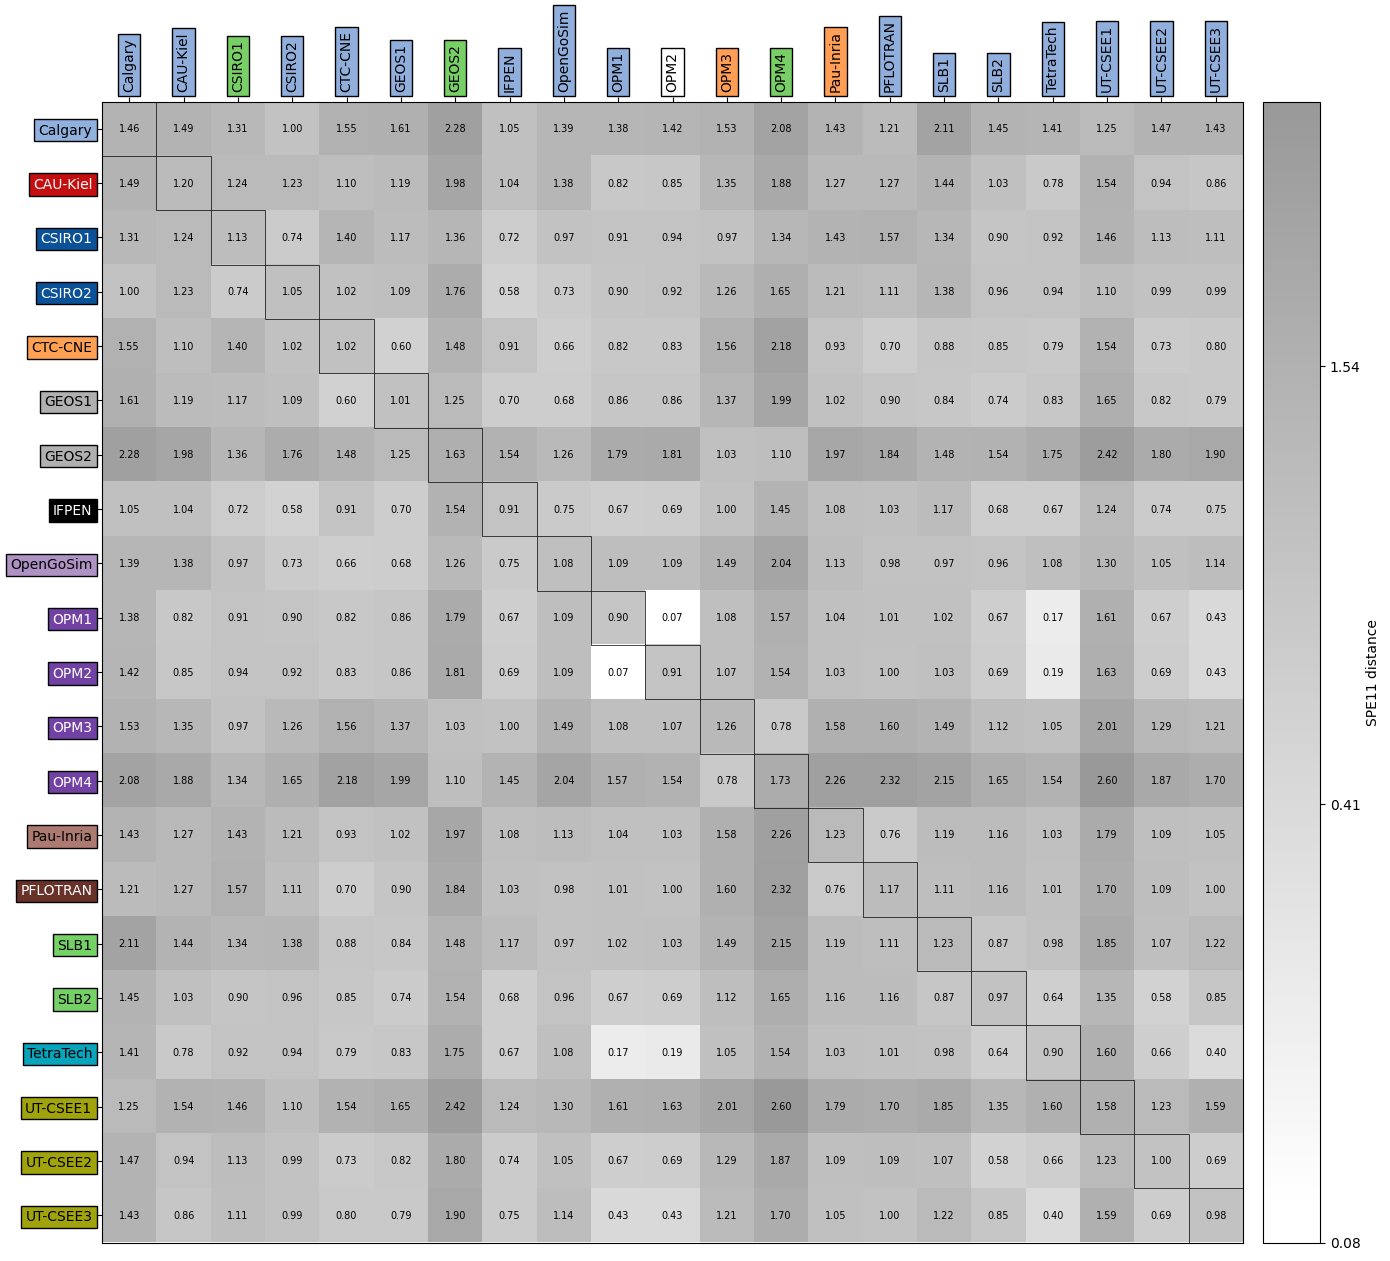

<Figure size 640x480 with 0 Axes>

In [3]:
%run ../analysis/analyze_distance_matrix.py \
-option show-distance-matrix \
-v spe11a \
-o output/spe11a

The respective image of the distance matrix is printed to file `output/spe11a/spe11a_distance_matrix.png`.

By specifying single groups through `-g`, one can extract a subset of the distance matrix for closer inspection.  NOTE: The next code block overwrites the image.

In [4]:
#%run ../analysis/analyze_distance_matrix.py \
#-option show-distance-matrix \
#-v spe11a \
#-o output/spe11a \
#-g TetraTech OPM4 Pau-Inria IFPEN

## Extracting single distances
We can extract single pairwise distances through the option `-option print-distances` together with a selection of groups thorugh `-g`. By the repeated use of `-g`, we can also specify a partitioning and only ask for the comparison within these groupings.

### Example analysis: Different groups using same simulators
As an example we analyze the base case submissions based on OPM  (`CAU-Kiel` and `OPM1`) as well as those based on SLB-IX (`CTC-CNE`, `SLB1`, `SLB2`, `TetraTech`, `UT-CSEE1`).

In [5]:
%run ../analysis/analyze_distance_matrix.py \
-option print-distances \
-v spe11a \
-o output/spe11a \
-g CAU-Kiel OPM1 \
-g CTC-CNE SLB2 UT-CSEE1 \
-g SLB1 SLB2

Distance between CAU-Kiel and OPM1: 0.8182780532944594
Distance between CTC-CNE and SLB2: 0.846655262699112
Distance between CTC-CNE and UT-CSEE1: 1.5380006508060755
Distance between SLB2 and UT-CSEE1: 1.3515506757054458
Distance between SLB1 and SLB2: 0.865101866176437


### Example analysis: Mesh refinement
We also compare spedific distances between some groups using refined meshes.

In [6]:
%run ../analysis/analyze_distance_matrix.py \
-option print-distances \
-v spe11a \
-o output/spe11a \
-g GEOS1 GEOS2 \
-g OPM1 OPM4 \
-g GEOS2 OPM4

Distance between GEOS1 and GEOS2: 1.2501672272443558
Distance between OPM1 and OPM4: 1.5716773354928373
Distance between GEOS2 and OPM4: 1.1010901596052558


### Example analysis: Unstructured grids.
We compare submissions using different grid types.

In [7]:
%run ../analysis/analyze_distance_matrix.py \
-option print-distances \
-v spe11a \
-o output/spe11a \
-g OPM1 OPM3

Distance between OPM1 and OPM3: 1.077151716015616


## Medians and correlations
The SPE11 distance uses scalings for each considered reporting quantity. It is essentially based on a median value of the distances of each type of quantity. Then the total SPE11 distance agglomerates the single distances, resulting in the natural question how well the single distances correlate to the global distance. The Pearson correlation coefficient (PCC) offers a quantitative measure. As part of the computation of the SPE11 distance, these statistics are recorded in the output folder as `spe11a_statistics.csv`

In [8]:
import pandas as pd
df = pd.read_csv('output/spe11a/spe11a_statistics.csv')
df

,Unnamed: 0,Median,PCC
0,mobA,0.075977,0.387879
1,immA,0.000319,0.244373
2,dissA,0.072738,0.367866
3,mobB,0.005547,0.703069
4,immB,0.000856,0.585071
5,dissB,0.040140,0.760414
6,mC,117.090638,0.480710
7,sealTot,0.024887,0.478551
8,early_pressure_l2s,366.175666,0.229219
9,late_pressure_l2,5538.254138,0.208004


## Visualization of clustering
The distance matrix provides means for linkage clustering vilsualized by a dendrogram. Using the option `-option show-clustering` the dendrogram is displayed and stored to file.

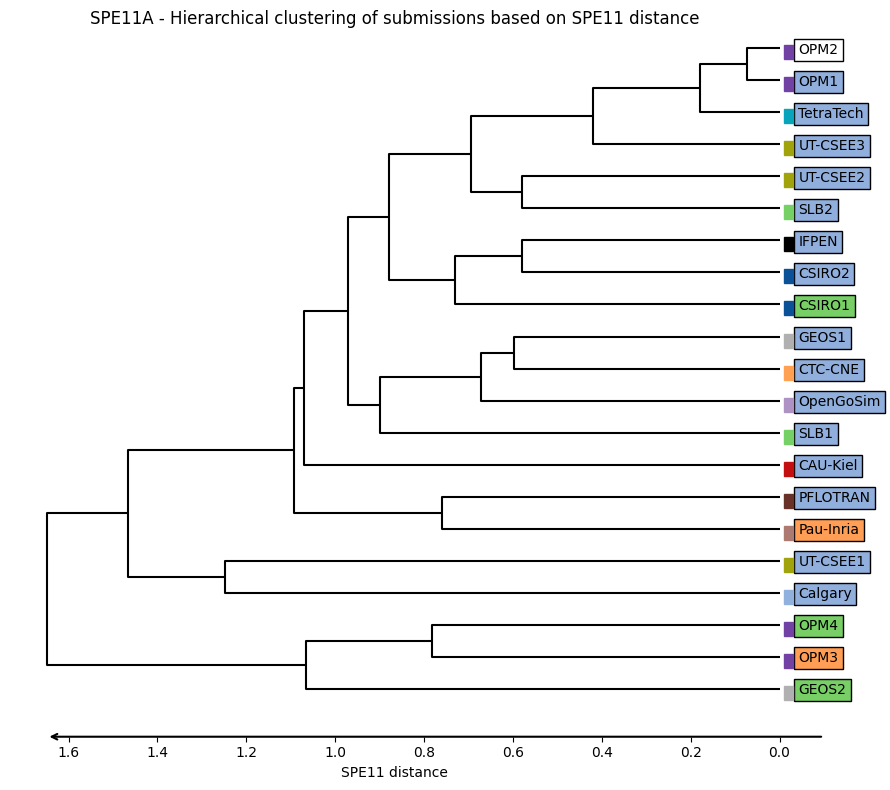

<Figure size 640x480 with 0 Axes>

In [9]:
%run ../analysis/analyze_distance_matrix.py \
-option show-clustering \
-v spe11a \
-o output/spe11a

# Finding the smallest mean distance (median result)
We define the median submission to be the submission with lowest average mean to all other submissions. For this we call the script `analyze_distance_matrix` and specify the option `-option find-min-mean-distance`. We can make a selection of groups selected for the analysis using `-g`.

In [10]:
%run ../analysis/analyze_distance_matrix.py \
-option find-min-mean-distance \
-v spe11a \
-o output/spe11a \
-g Calgary CAU-Kiel CSIRO1 CSIRO2 CTC-CNE GEOS1 GEOS2 \
   IFPEN OpenGoSim OPM1 OPM2 OPM3 OPM4 Pau-Inria PFLOTRAN \
   SLB1 SLB2 TetraTech UT-CSEE1 UT-CSEE2 UT-CSEE3


--------------------------------------------------------------------------------
MINIMUM AG MEAN DISTANCE:
--------------------------------------------------------------------------------

Within the group:
[['Calgary', 'CAU-Kiel', 'CSIRO1', 'CSIRO2', 'CTC-CNE', 'GEOS1', 'GEOS2', 'IFPEN', 'OpenGoSim', 'OPM1', 'OPM2', 'OPM3', 'OPM4', 'Pau-Inria', 'PFLOTRAN', 'SLB1', 'SLB2', 'TetraTech', 'UT-CSEE1', 'UT-CSEE2', 'UT-CSEE3']]
With distance 0.8970159632714763 and std 0.4175743730984167.
The group with the smallest mean distance to all other participants is:
TetraTech



## Finding the smallest pair-wise distance
By using the option `-option find-min-distance`, we can search for the smallest distance between two distinct submissions among the provided groups. Again, we can restrict the analysis to a subset using `-g`.

In [11]:
%run ../analysis/analyze_distance_matrix.py \
-option find-min-distance \
-v spe11a \
-o output/spe11a \
-g Calgary CAU-Kiel CSIRO1 CSIRO2 CTC-CNE GEOS1 GEOS2 \
   IFPEN OpenGoSim OPM1 OPM2 OPM3 OPM4 Pau-Inria PFLOTRAN \
   SLB1 SLB2 TetraTech UT-CSEE1 UT-CSEE2 UT-CSEE3


--------------------------------------------------------------------------------
MINIMUM DISTANCE:
--------------------------------------------------------------------------------

The minimum distance is 0.0732607785300046 between OPM1 and OPM2.


## Finding the smallest group-wise distance
By adding multiple groups through repeated use of `-g`, one introduces a collection of subgroups. For the option `-option find-min-distance`, the use of multiple subgroups, allows for excluding group-intern comparisons within the single selections. Using this, one can analyze e.g. the smallest distance between submissions from different groups.

In [12]:
%run ../analysis/analyze_distance_matrix.py \
-option find-min-distance \
-v spe11a \
-o output/spe11a \
-g Calgary \
-g CAU-Kiel \
-g CSIRO1 CSIRO2 \
-g CTC-CNE \
-g GEOS1 GEOS2 \
-g IFPEN \
-g OpenGoSim \
-g OPM1 OPM2 OPM3 OPM4 \
-g Pau-Inria \
-g PFLOTRAN \
-g SLB1 SLB2 \
-g TetraTech \
-g UT-CSEE1 UT-CSEE2 UT-CSEE3


--------------------------------------------------------------------------------
MINIMUM DISTANCE:
--------------------------------------------------------------------------------

The minimum distance is 0.1669125985091626 between OPM1 and TetraTech.


# Variability analysis (all submissions)

We can compute the variability in a single group. For this, we specify the group through `-g`. For example, we can compute the overall variability.

In [13]:
%run ../analysis/variability_analysis.py \
-v spe11a \
-o output/spe11a \
-g Calgary CAU-Kiel CSIRO1 CSIRO2 CTC-CNE GEOS1 GEOS2 \
   IFPEN OpenGoSim OPM1 OPM2 OPM3 OPM4 Pau-Inria PFLOTRAN \
   SLB1 SLB2 TetraTech UT-CSEE1 UT-CSEE2 UT-CSEE3


--------------------------------------------------------------------------------
VARIABILITY ANALYSIS:
--------------------------------------------------------------------------------

The mean distance among the 21 groups
[['Calgary', 'CAU-Kiel', 'CSIRO1', 'CSIRO2', 'CTC-CNE', 'GEOS1', 'GEOS2', 'IFPEN', 'OpenGoSim', 'OPM1', 'OPM2', 'OPM3', 'OPM4', 'Pau-Inria', 'PFLOTRAN', 'SLB1', 'SLB2', 'TetraTech', 'UT-CSEE1', 'UT-CSEE2', 'UT-CSEE3']]
is 1.1383045295252634 +- 0.05418233763938396 (margin of error) based on 
with a standard deviation of 0.46705548251693685.


Similarly, we can ask for the baseline variability. For this, we need to specify the baseline group as input. For SPE11A, these are `Calgary`, `CAU-Kiel`, `CSIRO2`, `CTC-CNE`, `GEOS1`, `IFPEN`, `OpenGoSim1`, `OPM1`, `PFLOTRAN`, `SLB1`, `SLB2`, `Tetratech`, `UT-CSEE1`, `UT-CSEE2`, `UT-CSEE3`.

In [14]:
%run ../analysis/variability_analysis.py \
-v spe11a \
-o output/spe11a \
-g Calgary CAU-Kiel CSIRO2 CTC-CNE GEOS1 IFPEN OpenGoSim OPM1 \
PFLOTRAN SLB1 SLB2 TetraTech UT-CSEE1 UT-CSEE2 UT-CSEE3


--------------------------------------------------------------------------------
VARIABILITY ANALYSIS:
--------------------------------------------------------------------------------

The mean distance among the 15 groups
[['Calgary', 'CAU-Kiel', 'CSIRO2', 'CTC-CNE', 'GEOS1', 'IFPEN', 'OpenGoSim', 'OPM1', 'PFLOTRAN', 'SLB1', 'SLB2', 'TetraTech', 'UT-CSEE1', 'UT-CSEE2', 'UT-CSEE3']]
is 1.009329401447967 +- 0.05776624777167738 (margin of error) based on 
with a standard deviation of 0.3408664782156503.


# Statistical analysis (comparison of variability)

## Baseline variability vs. overall variability

We can compute p-values of null-hypotheses comparing the variability of two groups, quantifying the statistical significance. E.g. we analyze whether the base case group has smaller variability than the overall variability. For this, we specify `-g-smaller` and `g-greater`, here being the base case group and all groups, respectively. 

In [15]:
%run ../analysis/variability_analysis.py \
-v spe11a \
-o output/spe11a \
-g-smaller Calgary CAU-Kiel CSIRO2 CTC-CNE GEOS1 IFPEN \
OpenGoSim OPM1 PFLOTRAN SLB1 SLB2 TetraTech UT-CSEE1 UT-CSEE2 UT-CSEE3 \
-g-greater Calgary CAU-Kiel CSIRO1 CSIRO2 CTC-CNE GEOS1 GEOS2 \
IFPEN OpenGoSim OPM1 OPM2 OPM3 OPM4 Pau-Inria PFLOTRAN SLB1 SLB2 \
TetraTech UT-CSEE1 UT-CSEE2 UT-CSEE3


--------------------------------------------------------------------------------
COMPARATIVE VARIABILITY ANALYSIS:
--------------------------------------------------------------------------------

The mean distance among the 15 groups
[['Calgary', 'CAU-Kiel', 'CSIRO2', 'CTC-CNE', 'GEOS1', 'IFPEN', 'OpenGoSim', 'OPM1', 'PFLOTRAN', 'SLB1', 'SLB2', 'TetraTech', 'UT-CSEE1', 'UT-CSEE2', 'UT-CSEE3']]
is 1.009329401447967 +- 0.05776624777167738 (margin of error) based on 
with a standard deviation of 0.3408664782156503.

The mean distance among the 21 groups
[['Calgary', 'CAU-Kiel', 'CSIRO1', 'CSIRO2', 'CTC-CNE', 'GEOS1', 'GEOS2', 'IFPEN', 'OpenGoSim', 'OPM1', 'OPM2', 'OPM3', 'OPM4', 'Pau-Inria', 'PFLOTRAN', 'SLB1', 'SLB2', 'TetraTech', 'UT-CSEE1', 'UT-CSEE2', 'UT-CSEE3']]
is 1.1383045295252634 +- 0.05418233763938396 (margin of error) based on 
with a standard deviation of 0.46705548251693685.

The hypothesis that the variability within
[['Calgary', 'CAU-Kiel', 'CSIRO2', 'CTC-CNE', 'GEOS1', 

## Commercial vs. academic/open-source simulators
Similarly, we can compute the p-value of the comparison of commercial and academic/open-source against all base case groups. 

The commercial group is given by: `CTC-CNE`, `SLB1`, `SLB2`,`UT-CSEE1`, `UT-CSEE2`, `UT-CSEE3`.

In [16]:
%run ../analysis/variability_analysis.py \
-v spe11a \
-o output/spe11a \
-g-smaller CTC-CNE SLB1 SLB2 UT-CSEE1 UT-CSEE2 UT-CSEE3 \
-g-greater Calgary CAU-Kiel CSIRO2 CTC-CNE GEOS1 IFPEN OpenGoSim OPM1 \
PFLOTRAN SLB1 SLB2 TetraTech UT-CSEE1 UT-CSEE2 UT-CSEE3


--------------------------------------------------------------------------------
COMPARATIVE VARIABILITY ANALYSIS:
--------------------------------------------------------------------------------

The mean distance among the 6 groups
[['CTC-CNE', 'SLB1', 'SLB2', 'UT-CSEE1', 'UT-CSEE2', 'UT-CSEE3']]
is 1.0358061196383619 +- 0.17349136559951917 (margin of error) based on 
with a standard deviation of 0.37080652060256414.

The mean distance among the 15 groups
[['Calgary', 'CAU-Kiel', 'CSIRO2', 'CTC-CNE', 'GEOS1', 'IFPEN', 'OpenGoSim', 'OPM1', 'PFLOTRAN', 'SLB1', 'SLB2', 'TetraTech', 'UT-CSEE1', 'UT-CSEE2', 'UT-CSEE3']]
is 1.009329401447967 +- 0.05776624777167738 (margin of error) based on 
with a standard deviation of 0.3408664782156503.

The hypothesis that the variability within
[['CTC-CNE', 'SLB1', 'SLB2', 'UT-CSEE1', 'UT-CSEE2', 'UT-CSEE3']]
is smaller than the variability within
[['Calgary', 'CAU-Kiel', 'CSIRO2', 'CTC-CNE', 'GEOS1', 'IFPEN', 'OpenGoSim', 'OPM1', 'PFLOTRAN', 'SLB1',

The academic/open-source group is given by: `Calgary`, `CAU-Kiel`, `CSIRO2`, `GEOS1`, `IFPEN`, `OpenGoSim`, `OPM1`, `PFLOTRAN`, `TetraTech`.

In [17]:
%run ../analysis/variability_analysis.py \
-v spe11a \
-o output/spe11a \
-g-smaller Calgary CAU-Kiel CSIRO2 GEOS1 IFPEN OpenGoSim OPM1 \
   PFLOTRAN TetraTech \
-g-greater Calgary CAU-Kiel CSIRO2 CTC-CNE GEOS1 IFPEN OpenGoSim OPM1 \
   PFLOTRAN SLB1 SLB2 TetraTech UT-CSEE1 UT-CSEE2 UT-CSEE3


--------------------------------------------------------------------------------
COMPARATIVE VARIABILITY ANALYSIS:
--------------------------------------------------------------------------------

The mean distance among the 9 groups
[['Calgary', 'CAU-Kiel', 'CSIRO2', 'GEOS1', 'IFPEN', 'OpenGoSim', 'OPM1', 'PFLOTRAN', 'TetraTech']]
is 0.984980319877341 +- 0.09045738396880743 (margin of error) based on 
with a standard deviation of 0.3036693296734796.

The mean distance among the 15 groups
[['Calgary', 'CAU-Kiel', 'CSIRO2', 'CTC-CNE', 'GEOS1', 'IFPEN', 'OpenGoSim', 'OPM1', 'PFLOTRAN', 'SLB1', 'SLB2', 'TetraTech', 'UT-CSEE1', 'UT-CSEE2', 'UT-CSEE3']]
is 1.009329401447967 +- 0.05776624777167738 (margin of error) based on 
with a standard deviation of 0.3408664782156503.

The hypothesis that the variability within
[['Calgary', 'CAU-Kiel', 'CSIRO2', 'GEOS1', 'IFPEN', 'OpenGoSim', 'OPM1', 'PFLOTRAN', 'TetraTech']]
is smaller than the variability within
[['Calgary', 'CAU-Kiel', 'CSIRO2', 'CT

Thus, we conclude statistical significance for that the academic simulators show a lower variability than the baseline variability.

# Multiple subsets

We can use the same tools to analyze variability differences for multiple subsets. By multiple use of `-g`, subsets of groups can be defined to consider only their pair-wise distances, still merged with other pair-wise distances. 

### Example analysis: Different groups using the same simulator
We revist the analysis of the groups using the same simulators (OPM and SLB-IX), now in the light of a variability analysis.

In [18]:
%run ../analysis/variability_analysis.py \
-v spe11a \
-o output/spe11a \
-g-smaller CAU-Kiel OPM1 \
-g-smaller CTC-CNE SLB2 UT-CSEE1 UT-CSEE2 UT-CSEE3 \
-g-greater Calgary CAU-Kiel CSIRO2 CTC-CNE GEOS1 IFPEN OpenGoSim OPM1 \
PFLOTRAN SLB1 SLB2 TetraTech UT-CSEE1 UT-CSEE2 UT-CSEE3


--------------------------------------------------------------------------------
COMPARATIVE VARIABILITY ANALYSIS:
--------------------------------------------------------------------------------

The mean distance among the 7 groups
[['CAU-Kiel', 'OPM1'], ['CTC-CNE', 'SLB2', 'UT-CSEE1', 'UT-CSEE2', 'UT-CSEE3']]
is 0.9738871588345098 +- 0.18957474677734554 (margin of error) based on 
with a standard deviation of 0.341678097515829.

The mean distance among the 15 groups
[['Calgary', 'CAU-Kiel', 'CSIRO2', 'CTC-CNE', 'GEOS1', 'IFPEN', 'OpenGoSim', 'OPM1', 'PFLOTRAN', 'SLB1', 'SLB2', 'TetraTech', 'UT-CSEE1', 'UT-CSEE2', 'UT-CSEE3']]
is 1.009329401447967 +- 0.05776624777167738 (margin of error) based on 
with a standard deviation of 0.3408664782156503.

The hypothesis that the variability within
[['CAU-Kiel', 'OPM1'], ['CTC-CNE', 'SLB2', 'UT-CSEE1', 'UT-CSEE2', 'UT-CSEE3']]
is smaller than the variability within
[['Calgary', 'CAU-Kiel', 'CSIRO2', 'CTC-CNE', 'GEOS1', 'IFPEN', 'OpenGoSim', '